In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import io

In [3]:
from google.colab import files
uploaded = files.upload()

Saving GM.csv to GM.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['GM.csv']))
print(df)

            Date       Open       High        Low      Close  Adj Close
0     11/19/2010  34.150002  34.500000  33.110001  34.259998  26.155405
1     11/22/2010  34.200001  34.480000  33.810001  34.080002  26.017986
2     11/23/2010  33.950001  33.990002  33.189999  33.250000  25.384335
3     11/24/2010  33.730000  33.799999  33.220001  33.480000  25.559925
4     11/26/2010  33.410000  33.810001  33.209999  33.799999  25.804228
...          ...        ...        ...        ...        ...        ...
3167   6/23/2023  35.930000  36.439999  35.799999  36.180000  36.082478
3168   6/26/2023  36.029999  36.990002  36.029999  36.700001  36.601078
3169   6/27/2023  37.009998  37.520000  36.450001  37.480000  37.378975
3170   6/28/2023  37.500000  38.209999  37.410000  38.189999  38.087059
3171   6/29/2023  38.330002  38.619999  38.000000  38.200001  38.097034

[3172 rows x 6 columns]


In [5]:
data_training = df[df['Date'] < '2023-03-15'].copy()
data_testing = df[df['Date'] >= '2023-03-15'].copy()

In [6]:
data_training = data_training.drop(['Date'], axis = 1)

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.31952284, 0.30860284, 0.32340134, 0.32576567, 0.23043024],
       [0.32060742, 0.3081801 , 0.33944535, 0.32191054, 0.22770325],
       [0.31518442, 0.29782292, 0.3252349 , 0.30413368, 0.21512888],
       ...,
       [0.4227766 , 0.41048405, 0.44602335, 0.4311416 , 0.48284824],
       [0.4362256 , 0.42506866, 0.46160895, 0.43392595, 0.48540796],
       [0.42928417, 0.40879312, 0.44671101, 0.42171779, 0.47418458]])

In [8]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape

(1242, 60, 5)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [11]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [12]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
39/39 [==============================] - 13s 149ms/step - loss: 0.0422
Epoch 2/50
39/39 [==============================] - 8s 199ms/step - loss: 0.0091
Epoch 3/50
39/39 [==============================] - 6s 150ms/step - loss: 0.0083
Epoch 4/50
39/39 [==============================] - 7s 182ms/step - loss: 0.0075
Epoch 5/50
39/39 [==============================] - 7s 165ms/step - loss: 0.0064
Epoch 6/50
39/39 [==============================] - 7s 168ms/step - loss: 0.0065
Epoch 7/50
39/39 [==============================] - 7s 181ms/step - loss: 0.0060
Epoch 8/50
39/39 [==============================] - 6s 149ms/step - loss: 0.0054
Epoch 9/50
39/39 [==============================] - 8s 197ms/step - loss: 0.0061
Epoch 10/50
39/39 [==============================] - 6s 149ms/step - loss: 0.0054
Epoch 11/50
39/39 [==============================] - 8s 202ms/step - loss: 0.0052
Epoch 12/50
39/39 [==============================] - 6s 151ms/step - loss: 0.0047
Epoch 13/50
39/39 [=====

In [14]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close
68,3/1/2011,33.689999,33.750000,32.430000,32.950001,25.155306
69,3/2/2011,32.900002,33.169998,32.590000,32.880001,25.101864
70,3/3/2011,33.029999,33.169998,32.650002,33.029999,25.216373
71,3/4/2011,33.070000,33.080002,32.009998,32.389999,24.727776
72,3/7/2011,32.349998,32.500000,31.520000,31.700001,24.201002


In [15]:
past_60_days = data_testing.tail(60)

In [16]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-16-5c4110cfb0fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close
0,36.509998,36.540001,35.290001,35.740002,35.544685
1,35.270000,35.380001,34.400002,35.090000,34.898239
2,35.000000,35.090000,34.470001,34.590000,34.400970
3,34.349998,35.740002,34.259998,35.730000,35.534737
4,35.880001,35.970001,35.340000,35.410000,35.216492


In [17]:
inputs = scaler.transform(df)
inputs

array([[0.37071582, 0.35172271, 0.37336696, 0.3574642 , 0.41675411],
       [0.34381781, 0.32720358, 0.35296818, 0.34354254, 0.40392583],
       [0.33796098, 0.32107378, 0.35457256, 0.33283361, 0.39405786],
       ...,
       [0.3815618 , 0.37243712, 0.39995417, 0.39473124, 0.45315435],
       [0.39219091, 0.38702176, 0.42195736, 0.4099379 , 0.46720579],
       [0.4101953 , 0.395688  , 0.43548016, 0.41015212, 0.46740374]])

In [18]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((1870, 60, 5), (1870,))

In [19]:
x_test.shape

(1870, 60, 5)

In [20]:
y_pred = regressor.predict(x_test)

59/59 [==============================] - 3s 44ms/step


In [21]:
scaler.scale_

array([0.02169198, 0.02113718, 0.02292001, 0.02141786, 0.01984432])

In [22]:
scale = 1 / 0.02169198
scale

46.09998718420356

In [23]:
y_pred = y_pred * scale
y_test = y_test * scale

In [24]:
y_pred.shape

(1870, 1)

In [25]:
y_test.shape

(1870,)

In [26]:
y_pred[1800:]

array([[12.585005 ],
       [12.869732 ],
       [13.395314 ],
       [13.902759 ],
       [14.156715 ],
       [14.254592 ],
       [14.315983 ],
       [14.528367 ],
       [14.950339 ],
       [15.4921055],
       [16.017263 ],
       [16.361507 ],
       [16.229795 ],
       [15.618471 ],
       [14.896606 ],
       [14.517897 ],
       [14.428366 ],
       [14.292091 ],
       [14.165742 ],
       [14.144809 ],
       [14.358185 ],
       [14.542521 ],
       [14.354123 ],
       [13.886892 ],
       [13.526462 ],
       [13.275992 ],
       [12.9718685],
       [12.643517 ],
       [12.459071 ],
       [12.6945505],
       [13.024602 ],
       [13.223682 ],
       [13.098436 ],
       [12.911454 ],
       [12.96645  ],
       [13.187225 ],
       [13.421151 ],
       [13.503204 ],
       [13.36507  ],
       [13.045    ],
       [12.579188 ],
       [12.169307 ],
       [12.022646 ],
       [12.191785 ],
       [12.499759 ],
       [12.886485 ],
       [13.128181 ],
       [13.09

In [27]:
y_test[1800:]

array([15.20999776, 15.70999765, 14.94999582, 14.03999601, 14.89999683,
       15.0399958 , 15.46999571, 16.82999642, 16.84999641, 16.95999739,
       17.08999436, 15.84999663, 15.57999668, 14.92999482, 16.4599975 ,
       16.56999847, 15.13999778, 15.32999674, 14.95999781, 16.02999759,
       15.44999571, 13.85999605, 14.109996  , 14.34999694, 14.5699989 ,
       13.47999913, 12.93999824, 12.99999523, 14.5799969 , 13.77999807,
       13.33999516, 12.87999626, 12.89999725, 13.96999603, 13.89999704,
       14.44999592, 13.42999514, 13.82999706, 12.96999624, 12.63999831,
       12.38999636, 12.85999626, 13.69999608, 13.28999617, 13.57999711,
       13.57999711, 12.73999729, 13.19999619, 14.27999796, 13.52999812,
       13.06999922, 14.23999697, 15.0299978 , 14.5799969 , 15.9699956 ,
       16.77999743, 18.06999815, 16.84999641, 17.53999527, 18.41999608,
       17.76999522, 18.69999502, 18.27999711, 17.88999719, 17.3599953 ,
       16.50999648, 16.60999546, 17.58999425, 18.07999615, 18.90

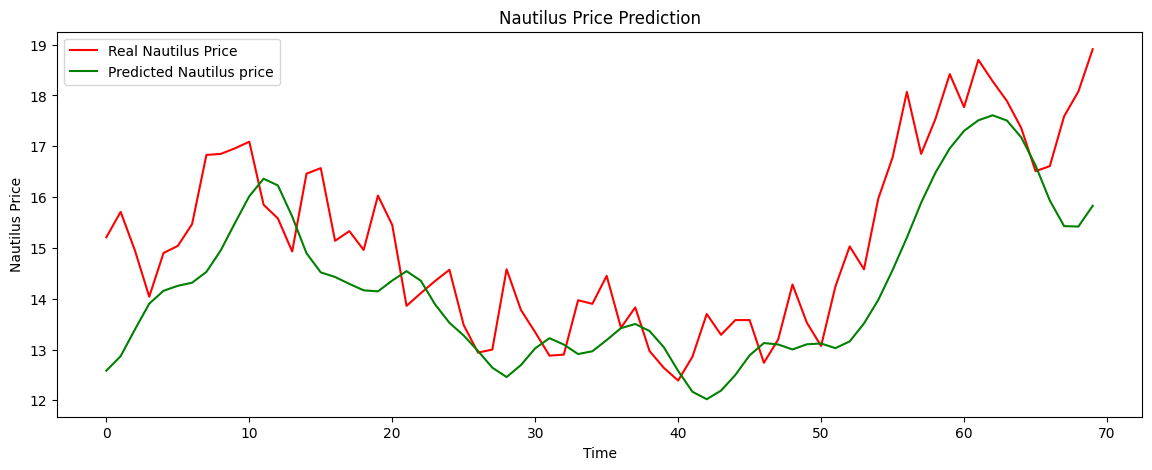

In [30]:
plt.figure(figsize = (14,5))
plt.plot(y_test[1800:], color = 'red', label = 'Real Nautilus Price')
plt.plot(y_pred[1800:], color = 'green', label = 'Predicted Nautilus price')
plt.title('Nautilus Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nautilus Price')
plt.legend()
plt.show()

In [31]:
for i in y_pred[1870:]:
  if y_pred[1870:] < 1.2 * y_test[1870:] & y_pred[1870:] > 0.75 * y_test[1870:]:
    print('1')
  else:
    print('0')
